In this notebook, I hope to show how a data scientist would go about working through a problem. The goal is to correctly predict if someone survived the Titanic shipwreck.

In [362]:
#import libaries
import os
import pandas as pd
import numpy as np

The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models.
The test set should be used to see how well your model performs on unseen data

In [363]:
train_df=pd.read_csv('/content/drive/MyDrive/train.csv')
test_df=pd.read_csv('/content/drive/MyDrive/test.csv')

Data Exploration Analysis

In [364]:
#it show the no. of columns and no. of rows
train_df.shape

(891, 12)

In [365]:
test_df.shape

(418, 11)

In [366]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [367]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [368]:
# In test data Survived column are not present
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [369]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

columns description:

PassengerId: Unique Id of a passenger.   
survival:Survival  
pclass: Ticket class  
Name: Name of Passenger  
sex:    Sex   
Age:    Age in years    
sibsp:  # of siblings / spouses aboard the Titanic  
parch:  # of parents / children aboard the Titanic  
ticket: Ticket number   
fare:   Passenger fare  
cabin:  Cabin number    
embarked:   Port of Embarkation

In [370]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [371]:
#it show data type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [372]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [373]:
#it show the missing value
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [374]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

missing value in age , cabin and embarked
more than 70% values are missing value in cabin column, will have to drop the cabin column.

In [375]:
#drop the cabin column
train_df.drop(columns=['Cabin'],inplace=True)

In [376]:
test_df.drop(columns=['Cabin'],inplace=True)

In [377]:
# fill the missing value by using mean in age
a=train_df['Age'].mean()
a

29.69911764705882

In [378]:
train_df['Age'].replace(np.nan,a,inplace=True)

In [379]:
b=test_df['Age'].mean()
b

30.272590361445783

In [380]:

test_df['Age'].replace(np.nan,b,inplace=True)

In [381]:

c=test_df['Fare'].mean()
c

35.6271884892086

In [382]:
test_df['Fare'].replace(np.nan,c,inplace=True)

In [383]:
train_df['Embarked'].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [384]:
#now we see that the 's' city come to the more time so we can replace by 's'
train_df['Embarked'].fillna('S',inplace=True)

In [385]:
#In the 'Embarked' there are only 2 missing value, so we can replace by 's'  
test_df['Embarked'].fillna('S',inplace=True)

In [386]:
#Let's check again
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [387]:

test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [388]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [389]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [390]:
#statisical representation
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data visualization

In [391]:
import matplotlib.pyplot as plt
import seaborn as sns


Since this competition is a binary classification competition, you can check the balance of the target column using countplot.
With below graph, we can see that Target(Survived) column is unbalanced.
It's too bad that there are more people who haven't survived

Out of 891 62 people died in the accident


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


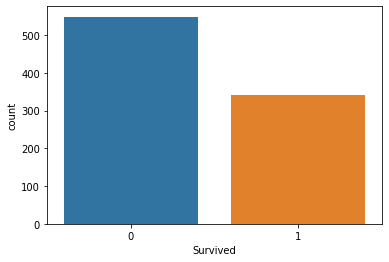

In [392]:
sns.countplot(train_df['Survived'])
death_precent= round ((train_df['Survived'].value_counts().values[0]/891)*100)
print("Out of 891 {} people died in the accident".format(death_precent))

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


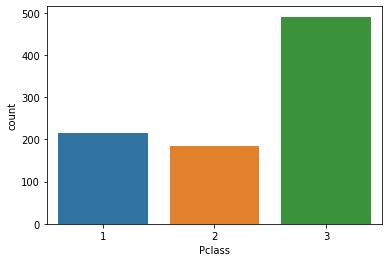

In [393]:
#in this graph we are see that according to classes, people are travelling.
print((train_df['Pclass'].value_counts()/891)*100)
sns.countplot(train_df['Pclass'])

From the graph below, we can see that despite the large number of male passengers,
the survival rate of male passengers is significantly lower than that of female passengers.

male      64.758698
female    35.241302
Name: Sex, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


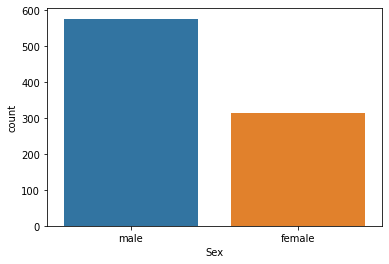

In [394]:
print((train_df['Sex'].value_counts()/891)*100)
sns.countplot(train_df['Sex'])

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


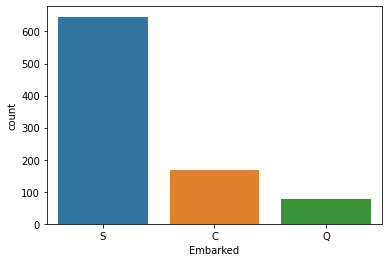

In [395]:
print((train_df['Embarked'].value_counts()/891)*100)
sns.countplot(train_df['Embarked'])

Outlier detection

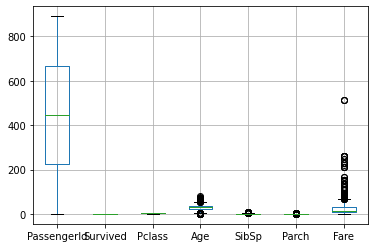

In [396]:

train_df.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


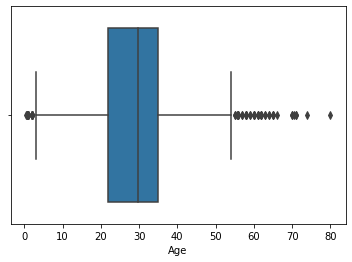

In [397]:
sns.boxplot(train_df['Age'])

In [398]:
#remove the outliner 
def remove_outliner(col):        
    sorted(col)
    q1,q2=col.quantile([0.25,0.75])
    IQR=q2-q1
    lr=q1-(1.5*IQR)
    ub=q2+(1.5*IQR)
    return lr,ub

In [399]:
lscore,upperscore=remove_outliner(train_df['Age']) #this algo for the particular column ..thats we given col name
train_df['Age']=np.where(train_df['Age']>upperscore,upperscore,train_df['Age'])
train_df['Age']=np.where(train_df['Age']<lscore,lscore,train_df['Age'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


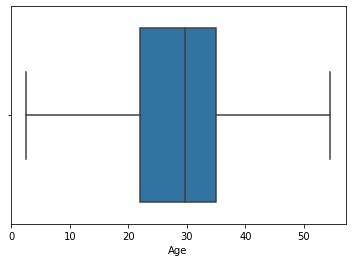

In [400]:
sns.boxplot(train_df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


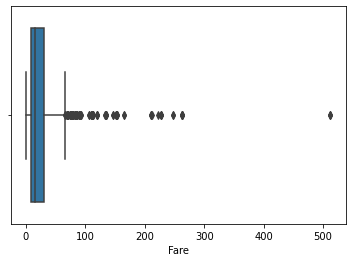

In [401]:
sns.boxplot(train_df['Fare'])

In [402]:
lscore,upperscore=remove_outliner(train_df['Fare']) #this algo for the particular column ..thats we given col name
train_df['Fare']=np.where(train_df['Fare']>upperscore,upperscore,train_df['Fare'])
train_df['Fare']=np.where(train_df['Fare']<lscore,lscore,train_df['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


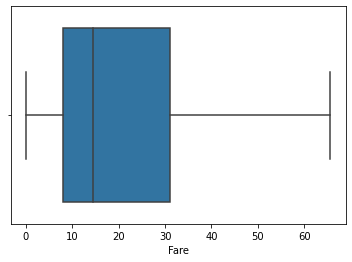

In [403]:
sns.boxplot(train_df['Fare'])

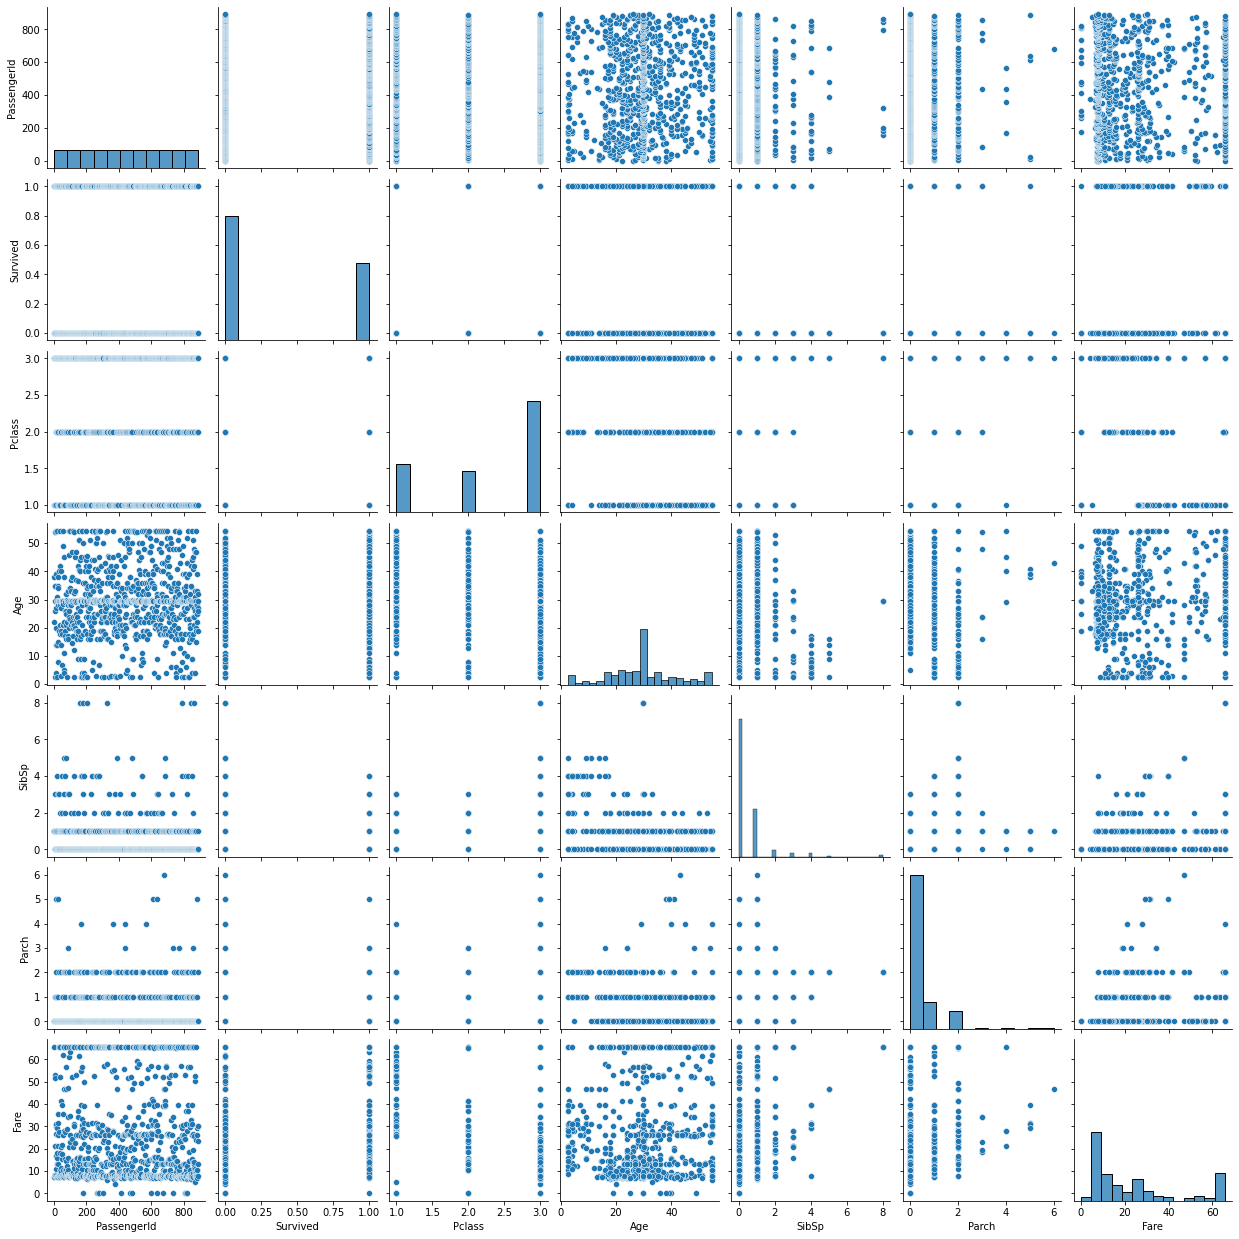

In [404]:
#pairplot graph
sns.pairplot(train_df)

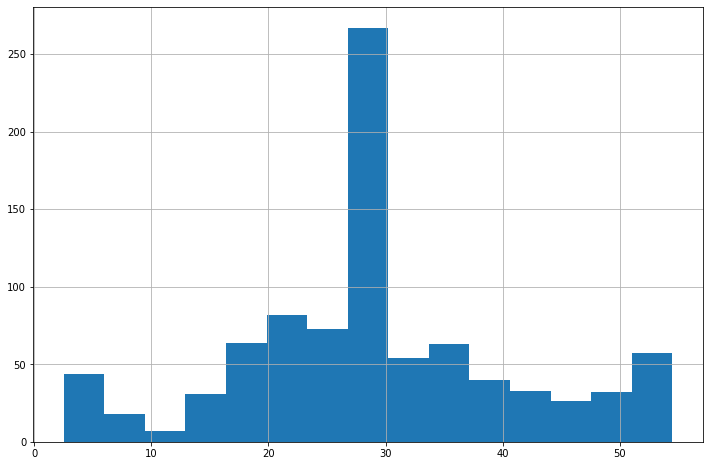

In [405]:
# representing histogram
train_df['Age'].hist(figsize=(12,8),bins=15)
plt.show()

In [406]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035533,-0.057527,-0.001652,0.003243
Survived,-0.005007,1.000000,-0.338481,-0.065857,-0.035322,0.081629,0.317430
Pclass,-0.035144,-0.338481,1.000000,-0.330962,0.083081,0.018443,-0.715300
Age,0.035533,-0.065857,-0.330962,1.000000,-0.238735,-0.186087,0.137498
SibSp,-0.057527,-0.035322,0.083081,-0.238735,1.000000,0.414838,0.332021
Parch,-0.001652,0.081629,0.018443,-0.186087,0.414838,1.000000,0.292616
Fare,0.003243,0.317430,-0.715300,0.137498,0.332021,0.292616,1.000000


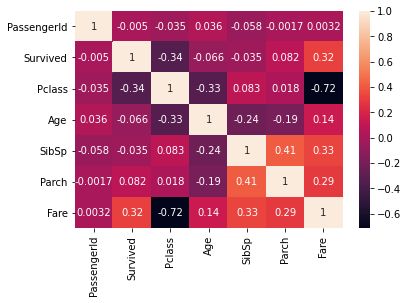

In [407]:
#representing correlation by heatmap
sns.heatmap(train_df.corr(),annot=True)

Feature Engineering

In [408]:

# we will create new column family for adding parch and sibsp
train_df['family_size']=train_df['Parch']+train_df['SibSp']

In [409]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,S,2
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,S,0
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,54.5,0,0,345364,6.2375,S,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S,0
494,495,0,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,S,0


In [410]:
# same we can apply in the test data.
test_df['family_size']=test_df['Parch']+test_df['SibSp']

In [411]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
257,1149,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,S,0
399,1291,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,Q,0
278,1170,2,"Ware, Mr. John James",male,30.0,1,0,CA 31352,21.0000,S,1
355,1247,1,"Julian, Mr. Henry Forbes",male,50.0,0,0,113044,26.0000,S,0
82,974,1,"Case, Mr. Howard Brown",male,49.0,0,0,19924,26.0000,S,0


In [412]:
#now we will enigneering feature family column by type
def family_type(number):
 if number==0:
    return 'Alone'
 elif number>0 and number<=4:
   return 'Medium'
 else:
    return'Large'

In [413]:
train_df['family_type']=train_df['family_size'].apply(family_type)

In [414]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
694,695,0,1,"Weir, Col. John",male,54.500000,0,0,113800,26.5500,S,0,Alone
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0000,S,0,Alone
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.000000,1,0,17453,65.6344,C,1,Medium
823,824,1,3,"Moor, Mrs. (Beila)",female,27.000000,0,1,392096,12.4750,S,1,Medium
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.000000,0,0,110152,65.6344,S,0,Alone


In [415]:
test_df['family_type']=test_df['family_size'].apply(family_type)

In [416]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
199,1091,3,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",female,30.27259,0,0,65305,8.1125,S,0,Alone
187,1079,3,"Davies, Mr. Joseph",male,17.00000,2,0,A/4 48873,8.0500,S,2,Medium
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.00000,1,4,19950,263.0000,S,5,Large
184,1076,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.00000,1,1,PC 17558,247.5208,C,2,Medium
201,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33000,0,2,347080,14.4000,S,2,Medium


In [417]:
#drop some columns which is not required.
train_df.drop(columns=["PassengerId","Name","Ticket","family_size"],inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_type
0,0,3,male,22.000000,1,0,7.2500,S,Medium
1,1,1,female,38.000000,1,0,65.6344,C,Medium
2,1,3,female,26.000000,0,0,7.9250,S,Alone
3,1,1,female,35.000000,1,0,53.1000,S,Medium
4,0,3,male,35.000000,0,0,8.0500,S,Alone
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Alone
887,1,1,female,19.000000,0,0,30.0000,S,Alone
888,0,3,female,29.699118,1,2,23.4500,S,Medium
889,1,1,male,26.000000,0,0,30.0000,C,Alone


In [418]:
test_df.drop(columns=["PassengerId","Name","Ticket","family_size"],inplace=True)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_type
0,3,male,34.50000,0,0,7.8292,Q,Alone
1,3,female,47.00000,1,0,7.0000,S,Medium
2,2,male,62.00000,0,0,9.6875,Q,Alone
3,3,male,27.00000,0,0,8.6625,S,Alone
4,3,female,22.00000,1,1,12.2875,S,Medium
...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S,Alone
414,1,female,39.00000,0,0,108.9000,C,Alone
415,3,male,38.50000,0,0,7.2500,S,Alone
416,3,male,30.27259,0,0,8.0500,S,Alone


In [419]:
#by using get_dummies function it can converted non-numerical data into numerical data 
df=pd.get_dummies(data=train_df, columns=['Pclass','Sex','Embarked','family_type'],drop_first=True)

In [420]:
df2=pd.get_dummies(data=test_df, columns=['Pclass','Sex','Embarked','family_type'],drop_first=True)

In [421]:

train_df=train_df.drop(columns=['Pclass','Sex','Embarked','family_type'],axis=1)

In [422]:
train_df=pd.concat([train_df,df],axis=1)
train_df

,Survived,Age,SibSp,Parch,Fare,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,0,22.000000,1,0,7.2500,0,22.000000,1,0,7.2500,0,1,1,0,1,0,1
1,1,38.000000,1,0,65.6344,1,38.000000,1,0,65.6344,0,0,0,0,0,0,1
2,1,26.000000,0,0,7.9250,1,26.000000,0,0,7.9250,0,1,0,0,1,0,0
3,1,35.000000,1,0,53.1000,1,35.000000,1,0,53.1000,0,0,0,0,1,0,1
4,0,35.000000,0,0,8.0500,0,35.000000,0,0,8.0500,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,27.000000,0,0,13.0000,1,0,1,0,1,0,0
887,1,19.000000,0,0,30.0000,1,19.000000,0,0,30.0000,0,0,0,0,1,0,0
888,0,29.699118,1,2,23.4500,0,29.699118,1,2,23.4500,0,1,0,0,1,0,1
889,1,26.000000,0,0,30.0000,1,26.000000,0,0,30.0000,0,0,1,0,0,0,0


In [423]:
test_df=test_df.drop(columns=['Pclass','Sex','Embarked','family_type'],axis=1)

In [424]:
test_df=pd.concat([test_df,df2],axis=1)

In [425]:
test_df.head()

,Age,SibSp,Parch,Fare,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,34.5,0,0,7.8292,34.5,0,0,7.8292,0,1,1,1,0,0,0
1,47.0,1,0,7.0000,47.0,1,0,7.0000,0,1,0,0,1,0,1
2,62.0,0,0,9.6875,62.0,0,0,9.6875,1,0,1,1,0,0,0
3,27.0,0,0,8.6625,27.0,0,0,8.6625,0,1,1,0,1,0,0
4,22.0,1,1,12.2875,22.0,1,1,12.2875,0,1,0,0,1,0,1


In [426]:
#Remove duplicates columns
test_df=test_df.T.drop_duplicates().T

In [427]:
test_df

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,34.50000,0.0,0.0,7.8292,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,47.00000,1.0,0.0,7.0000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,62.00000,0.0,0.0,9.6875,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,27.00000,0.0,0.0,8.6625,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,22.00000,1.0,1.0,12.2875,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,0.0,0.0,8.0500,0.0,1.0,1.0,0.0,1.0,0.0,0.0
414,39.00000,0.0,0.0,108.9000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,38.50000,0.0,0.0,7.2500,0.0,1.0,1.0,0.0,1.0,0.0,0.0
416,30.27259,0.0,0.0,8.0500,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [428]:
test_df.shape

(418, 11)

Split Indpendent and dependent variable

In [429]:
y = df.Survived
X = df.drop(["Survived"], axis = 1)

In [430]:
X

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,22.000000,1,0,7.2500,0,1,1,0,1,0,1
1,38.000000,1,0,65.6344,0,0,0,0,0,0,1
2,26.000000,0,0,7.9250,0,1,0,0,1,0,0
3,35.000000,1,0,53.1000,0,0,0,0,1,0,1
4,35.000000,0,0,8.0500,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,1,0,1,0,1,0,0
887,19.000000,0,0,30.0000,0,0,0,0,1,0,0
888,29.699118,1,2,23.4500,0,1,0,0,1,0,1
889,26.000000,0,0,30.0000,0,0,1,0,0,0,0


In [431]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

This is a binary classification problem.

**Modeling**

In [432]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [433]:
#Standardization/ Scale data
sc=StandardScaler()
X=sc.fit_transform(X)

In [434]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)


Logistic Regression Model  
Logistic regression is named for the function used at the core of the method, the logistic function.The logistic function, also called the sigmoid function 

In [435]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
result_LR=model.score(X_test,y_test)
print(result_LR)
predict=model.predict(X_test)
print(predict)


0.8044692737430168
[1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1
 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1]


In [436]:
#confusion matrix
#A confusion matrix is a technique for summarizing the performance of a classification algorithm. 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predict)
cm


array([[91, 13],
       [22, 53]])

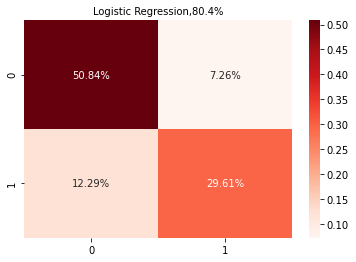

In [437]:
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title('Logistic Regression,80.4%', fontsize = 10)
plt.show()

Naive Bayes Classifiers
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 

In [438]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
model_NB=GaussianNB()
model_NB.fit(X_train,y_train)
result_NB=model_NB.score(X_test,y_test)
print(result_NB)
y_pred=model_NB.predict(X_test)
y_pred

0.742152466367713


array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,

In [439]:
from sklearn.metrics import confusion_matrix
cm_NB=confusion_matrix(y_test,y_pred)
cm_NB

array([[205,  78],
       [ 37, 126]])

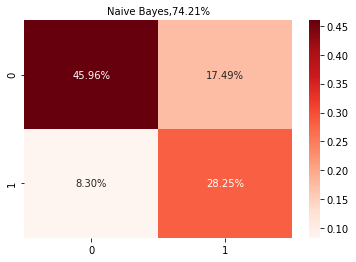

In [440]:
cm_NB= confusion_matrix(y_test, y_pred)
sns.heatmap(cm_NB/np.sum(cm_NB), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title('Naive Bayes,74.21%', fontsize = 10)
plt.show()

Decision Tree Classifer       
It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [441]:
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
result_DTC=classifier.score(X_test,y_test)
print(result_DTC)
y_pred=classifier.predict(X_test)
y_pred


0.770949720670391


array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1])

In [442]:
from sklearn.metrics import confusion_matrix
cm_1=confusion_matrix(y_test,y_pred)
cm_1

array([[84, 20],
       [21, 54]])

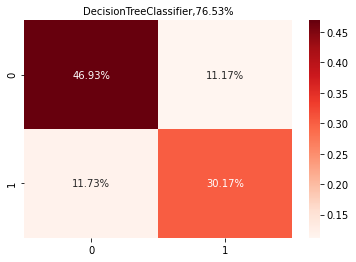

In [443]:
cm_1= confusion_matrix(y_test, y_pred)
sns.heatmap(cm_1/np.sum(cm_1), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title('DecisionTreeClassifier,76.53%', fontsize = 10)
plt.show()

## **K-Fold Cross Validation **                                  
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation. 
 Let's applied the cross validation on decision tree classifier

In [444]:
from sklearn.model_selection import KFold
classifier=DecisionTreeClassifier()
kfold_validation=KFold(10)

In [445]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(classifier,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.71111111 0.7752809  0.73033708 0.78651685 0.79775281 0.79775281
 0.78651685 0.73033708 0.80898876 0.83146067]
0.775605493133583


Radom Forest Classifier      

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In this project the parameter are using n_esitmator=100(The number of trees in the forest) and criterion=gini(Supported criteria are “gini” for the Gini impurity)

In [446]:
from sklearn.ensemble import RandomForestClassifier
classifier_1=RandomForestClassifier(n_estimators=100,criterion='gini')
classifier_1.fit(X_train,y_train)
result_RFC=classifier_1.score(X_test,y_test)
print(result_RFC)
y_pred=classifier_1.predict(X_test)
y_pred

0.8212290502793296


array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1])

In [447]:
from sklearn.metrics import confusion_matrix
cm_class=confusion_matrix(y_test,y_pred)
cm_class

array([[90, 14],
       [18, 57]])

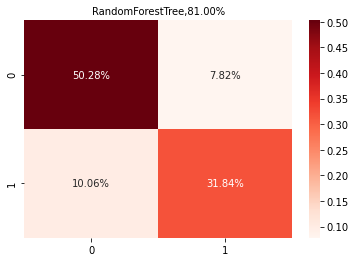

In [448]:
cm_class= confusion_matrix(y_test, y_pred)
sns.heatmap(cm_class/np.sum(cm_class), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title('RandomForestTree,81.00%', fontsize = 10)
plt.show()

In [449]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       104
           1       0.80      0.76      0.78        75

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

0.8212290502793296


Boost Tequince(ADA boost) 

An AdaBoostclassifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
Its squential working on model all nodes does not get same weightage.
  
We are using learnig rate=1 (Weight applied to each classifier at each boosting iteration.)

In [450]:
from sklearn.ensemble import AdaBoostClassifier
Adamodel=AdaBoostClassifier(n_estimators=100,learning_rate=1)
Adamodel.fit(X_train,y_train)
result_Ada=Adamodel.score(X_test,y_test)
print(result_Ada)
y_pred1=Adamodel.predict(X_test)
y_pred1

0.8044692737430168


array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1])

In [451]:
from sklearn.metrics import confusion_matrix
cm_Adamodel=confusion_matrix(y_test,y_pred1)
cm_Adamodel

array([[91, 13],
       [22, 53]])

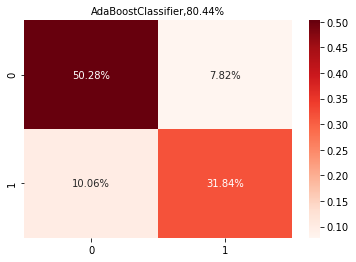

In [452]:
cm_Adamodel= confusion_matrix(y_test, y_pred)
sns.heatmap(cm_Adamodel/np.sum(cm_Adamodel), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title('AdaBoostClassifier,80.44%', fontsize = 10)
plt.show()

SVM  

SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

 Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels such as linear, polynomial,sigmiod,rbf

In [453]:
from sklearn import svm
model_svm=svm.SVC(C=2,kernel='rbf',gamma='auto')
model_svm.fit(X_train,y_train)
result_svm=model_svm.score(X_test,y_test)
print(result_svm)
y_predict=model_svm.predict(X_test)
y_predict

0.8100558659217877


array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1])

In [454]:
from sklearn.metrics import confusion_matrix
cm_svm=confusion_matrix(y_test,y_predict)
cm_svm

array([[96,  8],
       [26, 49]])

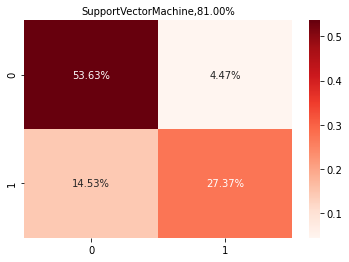

In [455]:
cm_svm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm_svm/np.sum(cm_svm), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title('SupportVectorMachine,81.00%', fontsize = 10)
plt.show()

In [456]:
models = pd.DataFrame({
    'Model': ['Logistic Regression Model','Naive Bayes Classifiers ','Decision Tree Classifer','Radom Forest Classifier',
              'AdaBoostClassifier','SVM'],
    'Score': [result_LR,result_NB,result_DTC,result_RFC,result_Ada,result_svm]})
models.sort_values(by='Score')

,Model,Score
1,Naive Bayes Classifiers,0.742152
2,Decision Tree Classifer,0.770950
0,Logistic Regression Model,0.804469
4,AdaBoostClassifier,0.804469
5,SVM,0.810056
3,Radom Forest Classifier,0.821229


Conclusion - In this problem Support Vector Machine gives best result which is 81.00%

In [457]:
#Now the using  fit function on test data
test_df=sc.fit_transform(test_df)

In [458]:
#apply best model on test data set
y_pred=model_svm.predict(test_df)

In [459]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [479]:
# Create a submisison dataframe
submission = pd.DataFrame()
submission['Survived'] = y_pred
submission.tail(5)

,Survived
413,0
414,1
415,0
416,0
417,0


In [476]:
gender_df=pd.read_csv('/content/drive/MyDrive/gender_submission.csv')

In [480]:
#What does our submission have to look like?
gender_df.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
